In [35]:
import os
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

In [36]:
def calculate_statistics(image):
    # Menghitung konvergensi (mean) dan skew dari nilai piksel gambar
    mean = np.mean(image)
    skewness = skew(image.flatten())
    return mean, skewness

In [37]:
def main():
    # Path ke direktori gambar
    base_path = r'C:\Bangkit\ML\code\preprocessing\normalize\dataset-normalize'

    # Path untuk menyimpan file CSV
    csv_file_path = r'C:\Bangkit\ML\code\preprocessing\normalize\before-normalize.csv'

    # List untuk menyimpan data statistik
    data = []

    # Loop melalui setiap folder di dalam direktori
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)

        # Pastikan yang sedang diproses adalah direktori
        if os.path.isdir(folder_path):
            # Loop melalui setiap file dalam folder
            for filename in os.listdir(folder_path):
                image_path = os.path.join(folder_path, filename)

                # Pastikan file adalah file gambar
                if os.path.isfile(image_path):
                    try:
                        # Baca gambar
                        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                        # Hitung konvergensi dan skew gambar
                        mean, skewness = calculate_statistics(image)

                        # Simpan data dalam list
                        data.append([folder_name, filename, mean, skewness])
                    except Exception as e:
                        print(f"Error processing image {image_path}: {str(e)}")

    # Menulis data ke file CSV
    with open(csv_file_path, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        # Menulis header ke file CSV
        writer.writerow(['Folder', 'Filename', 'Mean', 'Skew'])
        # Menulis data ke file CSV
        writer.writerows(data)

    print("Image pixel scale check completed. CSV file saved at:", csv_file_path)

    # Plotting
    means = [row[2] for row in data]
    skews = [row[3] for row in data]

    plt.figure(figsize=(12, 8))

    # Plot histogram mean
    plt.subplot(2, 1, 1)
    plt.hist(means, bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Histogram of Image Mean Values')
    plt.xlabel('Mean Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.axvline(np.mean(means), color='red', linestyle='dashed', linewidth=1)
    plt.text(np.mean(means), plt.ylim()[1]*0.9, f'Mean: {np.mean(means):.2f}', color='red')

    # Plot histogram skew
    plt.subplot(2, 1, 2)
    plt.hist(skews, bins=50, color='green', alpha=0.7, edgecolor='black')
    plt.title('Histogram of Image Skewness Values')
    plt.xlabel('Skewness')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.axvline(np.mean(skews), color='red', linestyle='dashed', linewidth=1)
    plt.text(np.mean(skews), plt.ylim()[1]*0.9, f'Mean: {np.mean(skews):.2f}', color='red')

    plt.tight_layout()
    plt.show()

Image pixel scale check completed. CSV file saved at: C:\Bangkit\ML\code\preprocessing\normalize\before-normalize.csv


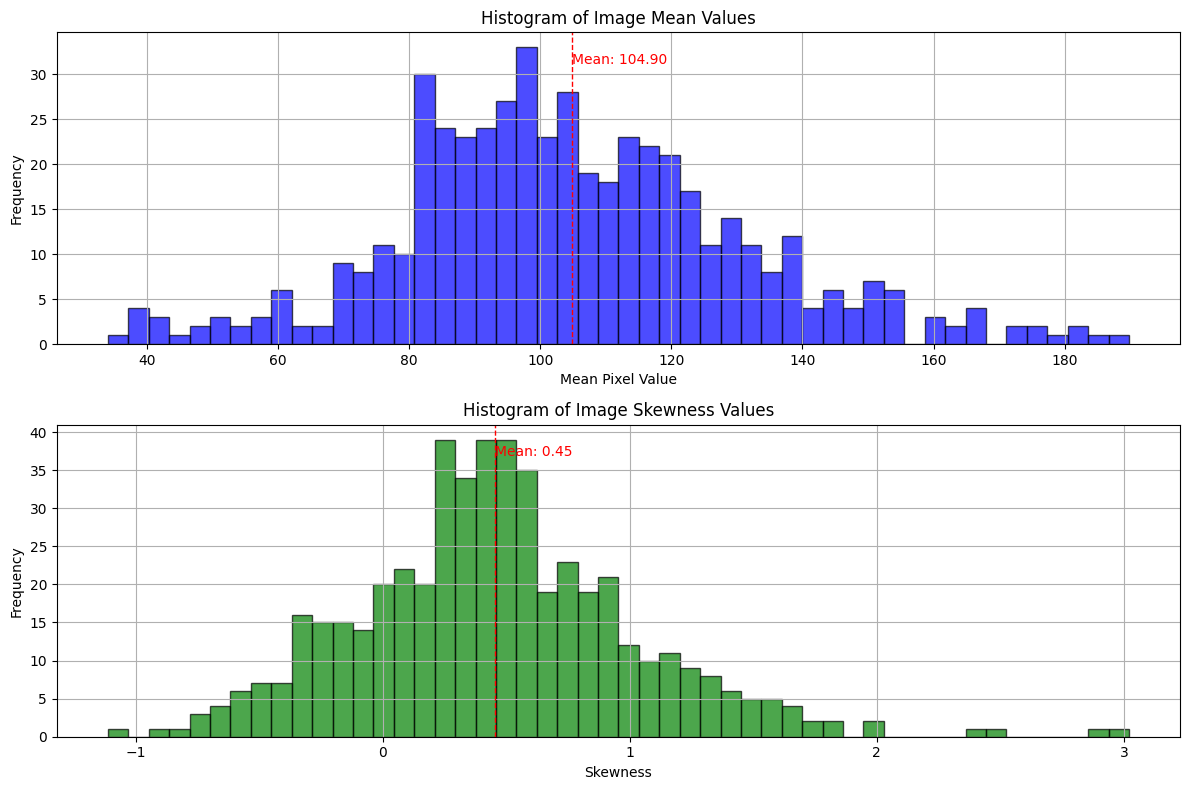

In [38]:
if __name__ == "__main__":
    main()